Question 6


In [3]:
import numpy as np

def kernel(size, sigma, direction='x'):
    k = size // 2
    x, y = np.meshgrid(np.arange(-k, k+1), np.arange(-k, k+1))

    G = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    G = G / (2 * np.pi * sigma**2)

    if direction == 'x':
        dG = -x / (sigma**2) * G
    else:
        dG = -y / (sigma**2) * G

   
    dG = dG / np.sum(np.abs(dG))
    return dG

x_direction = kernel(5, 2, 'x')
y_direction = kernel(5, 2, 'y')

print("x-direction:\n", x_direction)
print("\ny-direction:\n", y_direction)

x-direction:
 [[ 0.04413011  0.03210446  0.         -0.03210446 -0.04413011]
 [ 0.06420893  0.04671172  0.         -0.04671172 -0.06420893]
 [ 0.07275825  0.05293131  0.         -0.05293131 -0.07275825]
 [ 0.06420893  0.04671172  0.         -0.04671172 -0.06420893]
 [ 0.04413011  0.03210446  0.         -0.03210446 -0.04413011]]

y-direction:
 [[ 0.04413011  0.06420893  0.07275825  0.06420893  0.04413011]
 [ 0.03210446  0.04671172  0.05293131  0.04671172  0.03210446]
 [ 0.          0.          0.          0.          0.        ]
 [-0.03210446 -0.04671172 -0.05293131 -0.04671172 -0.03210446]
 [-0.04413011 -0.06420893 -0.07275825 -0.06420893 -0.04413011]]


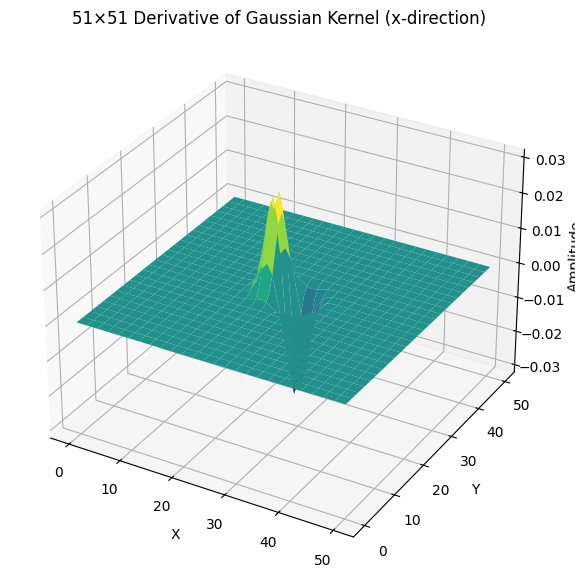

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_51 = kernel(51, 2, 'x')

x = np.arange(51)
y = np.arange(51)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, x_51, cmap='viridis')

ax.set_title("51×51 Derivative of Gaussian Kernel (x-direction)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Amplitude")

plt.show()


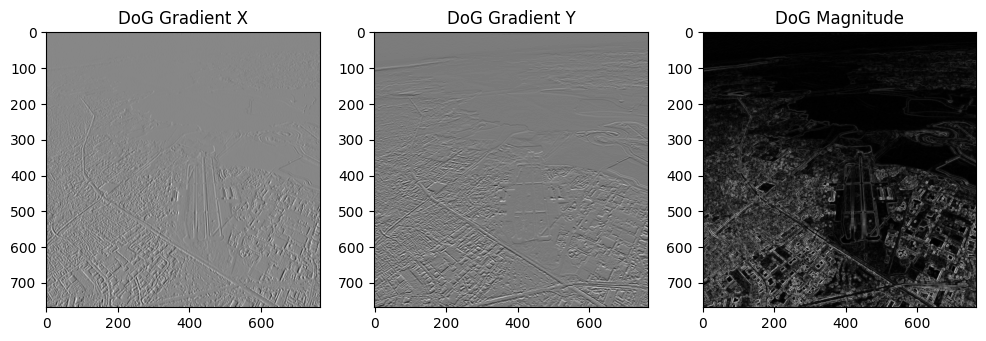

In [7]:
import cv2
from scipy.ndimage import convolve

# Load grayscale image
img = cv2.imread("runway.png", cv2.IMREAD_GRAYSCALE)

# Apply DoG kernels
x_dog = convolve(img.astype(float), x_direction)
y_dog = convolve(img.astype(float), y_direction)

# Gradient magnitude
grad_mag_dog = np.sqrt(x_dog**2 + y_dog**2)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(x_dog, cmap='gray'), plt.title("DoG Gradient X")
plt.subplot(1,3,2), plt.imshow(y_dog, cmap='gray'), plt.title("DoG Gradient Y")
plt.subplot(1,3,3), plt.imshow(grad_mag_dog, cmap='gray'), plt.title("DoG Magnitude")
plt.show()


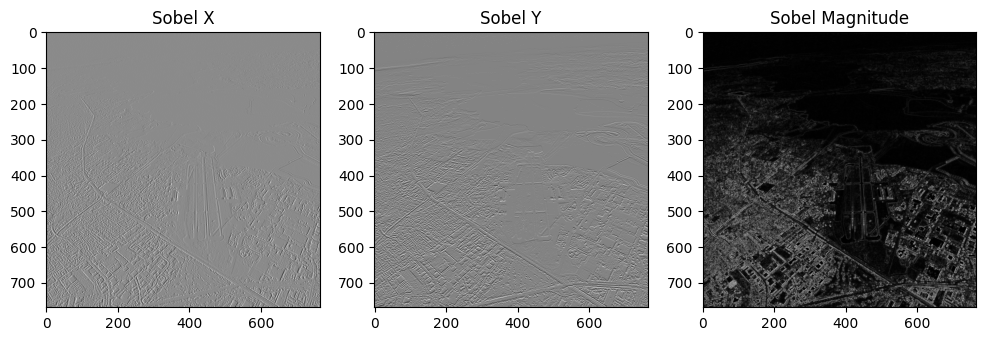

In [8]:
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

sobel_mag = np.sqrt(sobel_x**2 + sobel_y**2)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(sobel_x, cmap='gray'), plt.title("Sobel X")
plt.subplot(1,3,2), plt.imshow(sobel_y, cmap='gray'), plt.title("Sobel Y")
plt.subplot(1,3,3), plt.imshow(sobel_mag, cmap='gray'), plt.title("Sobel Magnitude")
plt.show()
